In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from PIL.ImageGrab import grab


def predict(X, w, b):
    return X * w + b


def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)


def gradient(X, Y, w, b):
    w_gradient = 2 * np.average(X * (predict(X, w, b) - Y))
    b_gradient = 2 * np.average(predict(X, w, b) - Y)
    return w_gradient, b_gradient


def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        if i % 5000 == 0:
            print("Iteration %4d => Loss: %.10f" % (i, loss(X, Y, w, b)))
        w_gradient, b_gradient = gradient(X, Y, w, b)
        w -= w_gradient * lr
        b -= b_gradient * lr
    return w, b


reservations, pizzas = np.loadtxt("pizza.txt", skiprows=1, unpack=True)
w, b = train(X=reservations, Y=pizzas, iterations=20000, lr=0.001)
print("\nw=%.10f, b=%.10f" % (w, b))
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w, b)))

Iteration    0 => Loss: 812.8666666667
Iteration 5000 => Loss: 23.0660254210
Iteration 10000 => Loss: 22.8438317248
Iteration 15000 => Loss: 22.8427421050

w=1.0811301700, b=13.1722676564
Prediction: x=20 => y=34.79


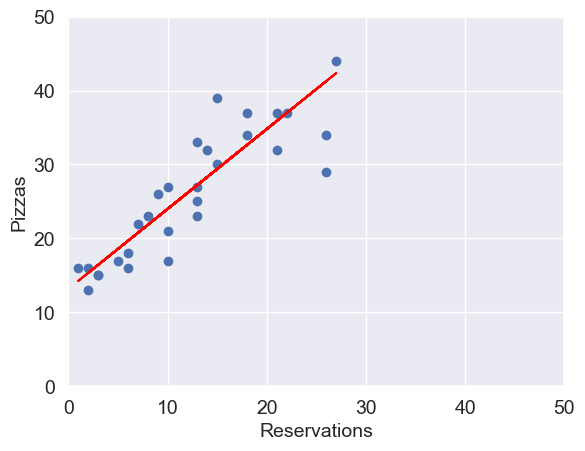

In [3]:
sea.set()
plt.axis([0., 50., 0., 50.])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Reservations", fontsize=14)
plt.ylabel("Pizzas", fontsize=14)
plt.plot(reservations, pizzas, "bo")
plt.plot(reservations, predict(reservations, w, b), color="red", label="Prediction")